In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
X = data.drop(['Species'], axis=1)
y = data['Species']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
dtc = DecisionTreeClassifier()

In [6]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
y_pred = dtc.predict(X_test)

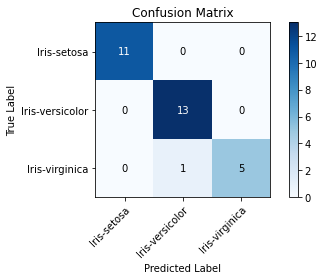

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Hitung confusion matrix
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Buat label
classes = np.unique(y_test)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True Label',
       xlabel='Predicted Label')

# Atur label pada sumbu x agar tidak tumpang tindih
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Tambahkan nilai confusion matrix pada masing-masing sel
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

fig.tight_layout()
plt.show()


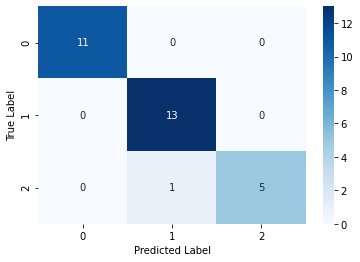

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung confusion matrix
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Buat heatmap confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Atur label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Tampilkan plot
plt.show()


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9666666666666667
Precision: 0.9690476190476189
Recall: 0.9666666666666667
F1-score: 0.9657687991021324
